# Multiple Linear Regression in Keras

### Import Libraries

In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

### Define data

In [2]:
# Let X have two features (X1 and X2) where each feature is a random uniform variable distributed between 0 and 10
# Let y = 2*X1 + X2 + 1 + N(0,1)
X = np.random.uniform(0,10, size=(10000, 2))
y = X@[2,1] + 1 + np.random.normal(0, 1, size=(10000))
# note I could also define this as:
# y = np.dot(X[0],[2,1]) + 1 + np.random.normal(0, 1 size=(10000))

### Define model with one layer and one node
- Equivalent to a linear regression model, but we will train the model with gradient descent instead of with the analytical solution (which minimizes mse)

In [3]:
model = Sequential()
# note that X.shape[1] is the number of columns (features) in X
model.add(Dense(1, input_shape=(X.shape[1],), activation='linear'))
model.compile(optimizer='adam', loss='mse')

### View a summary of the model layers, dimensions of outputs, and number of weight in each layer
- 3 parameters in the model : 2 weights and 1 bias

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Train the model
- Record the loss at each epoch with the history variable

In [5]:
history = model.fit(X, y, epochs=64, verbose=0, batch_size=32)

### Plot the value of the loss function at each epoch

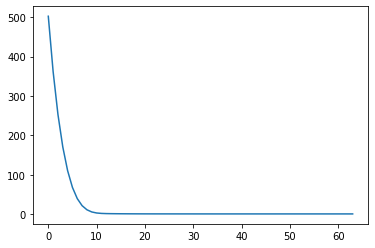

In [6]:
plt.plot(history.history['loss'])
plt.show()

### Define 10 more data points to test on using the same formula as in training

In [7]:
X_test = np.random.uniform(0,10, size=(10,2))
y_test = X_test@[2,1] + 1 + np.random.normal(0,1, size=(10))

### See how it performs

In [8]:
y_pred = model.predict(X_test).flatten()
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print('rmse:', rmse)
print('r^2:', r2)

rmse: 1.098060485001555
r^2: 0.9685116559041436


In [9]:
X@[2,1]

array([14.54310616, 23.13244202, 14.79648238, ..., 15.79345211,
       11.54119307,  2.8922582 ])

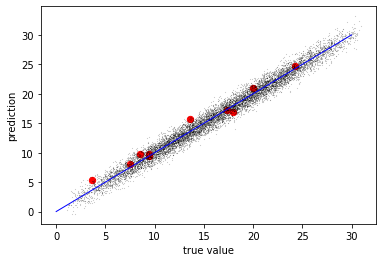

In [10]:
# plot predictions
plt.scatter(y_test, y_pred, s=40, color='red')
# plot training data
plt.scatter(X@[2,1] + 1, y, color='black', s=0.005)
# plot line where error = 0
plt.plot([0,30], [0,30], lw=1, color='blue')
plt.xlabel('true value')
plt.ylabel('prediction')
plt.show()

### Examine the trained weight values of the model

In [11]:
weights, biases = model.layers[0].get_weights()

In [12]:
print(weights)

[[1.9952719]
 [0.9974535]]


In [13]:
print(biases)

[1.0423093]


### The weights learned by the model were very close to replicating the true function

#### See that you can replicate the model.predict() function in this example by using matrix multiplication and addition with the model's weights/biases

In [14]:
# 2*0 + 1*1 + 1 = 2
np.dot(np.asarray([[0,1]]),weights) + biases

array([[2.03976279]])

In [15]:
np.asarray([[0,1]])@weights + biases

array([[2.03976279]])